In [4]:

# Importing the libraries
import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)

# Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

np.set_printoptions(precision=2)
print()
print("After doing the Multiple regression")
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

<ipython-input-5-ccd2bc0e439e>:33: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((y - y_predicted) / y)) * 100
<ipython-input-5-ccd2bc0e439e>:33: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y - y_predicted) / y)) * 100


Iteration 1: m = 0.0100, b = 0.0000, Cost = 2.5000, Accuracy = nan%
Iteration 2: m = 0.0199, b = -0.0000, Cost = 2.4502, Accuracy = nan%
Iteration 3: m = 0.0297, b = -0.0000, Cost = 2.4015, Accuracy = -inf%
Iteration 4: m = 0.0394, b = -0.0000, Cost = 2.3537, Accuracy = -inf%
Iteration 5: m = 0.0490, b = -0.0000, Cost = 2.3069, Accuracy = -inf%
Iteration 6: m = 0.0585, b = -0.0000, Cost = 2.2610, Accuracy = -inf%
Iteration 7: m = 0.0679, b = -0.0000, Cost = 2.2160, Accuracy = -inf%
Iteration 8: m = 0.0773, b = -0.0000, Cost = 2.1719, Accuracy = -inf%
Iteration 9: m = 0.0865, b = -0.0000, Cost = 2.1286, Accuracy = -inf%
Iteration 10: m = 0.0956, b = -0.0000, Cost = 2.0863, Accuracy = -inf%
Iteration 11: m = 0.1047, b = -0.0000, Cost = 2.0448, Accuracy = -inf%
Iteration 12: m = 0.1136, b = 0.0000, Cost = 2.0041, Accuracy = -inf%
Iteration 13: m = 0.1225, b = 0.0000, Cost = 1.9642, Accuracy = nan%
Iteration 14: m = 0.1313, b = 0.0000, Cost = 1.9251, Accuracy = -inf%
Iteration 15: m = 0.13

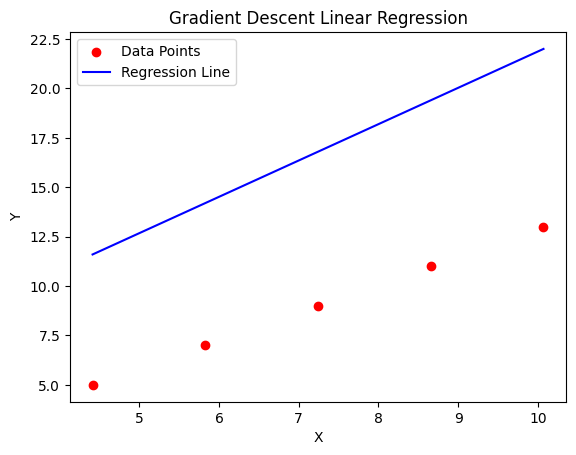

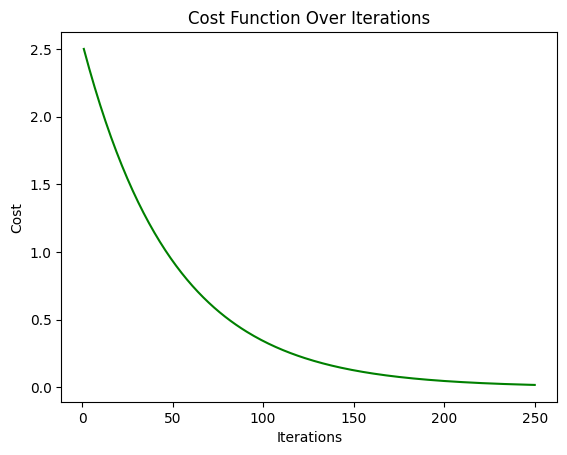

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(x, y, threshold=99):
    m_curr = b_curr = 0
    iterations = 250  # Increased iterations
    n = len(x)
    learning_rate = 0.01  # Increased learning rate
    costs = []  # Store cost values for plotting

    # Normalize data
    x_mean, x_std = np.mean(x), np.std(x)
    y_mean, y_std = np.mean(y), np.std(y)
    x = (x - x_mean) / x_std
    y = (y - y_mean) / y_std

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr

        # Compute gradients
        m_derivative = -sum(x * (y - y_predicted)) / n
        b_derivative = -sum(y - y_predicted) / n

        # Update parameters
        m_curr -= learning_rate * m_derivative
        b_curr -= learning_rate * b_derivative

        # Compute cost
        cost = (1/2) * sum((y - y_predicted) ** 2)
        costs.append(cost)

        # Calculate accuracy
        mape = np.mean(np.abs((y - y_predicted) / y)) * 100
        accuracy = 100 - mape
        print(f"Iteration {i+1}: m = {m_curr:.4f}, b = {b_curr:.4f}, Cost = {cost:.4f}, Accuracy = {accuracy:.2f}%")

        # Stop when accuracy > 99%
        if accuracy > threshold:
            print(f"Stopping early at iteration {i+1} due to accuracy > {threshold}%")
            break

    return m_curr, b_curr, costs, x_mean, x_std, y_mean, y_std

x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])

# Perform gradient descent
m, b, costs, x_mean, x_std, y_mean, y_std = gradient_descent(x, y, threshold=99)

# Denormalize values for plotting
x_plot = x * x_std + x_mean
y_pred = m * x + b
y_pred = y_pred * y_std + y_mean

# Plot the data points
plt.scatter(x_plot, y, color='red', label='Data Points')

# Plot the regression line
plt.plot(x_plot, y_pred, color='blue', label='Regression Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gradient Descent Linear Regression')
plt.legend()
plt.show()

# Plot the cost function over iterations
plt.plot(range(1, len(costs) + 1), costs, color='green')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()